### Also called naive forecast model

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('daily-min-temperatures.csv', parse_dates=[0])

In [3]:
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [4]:
df['t'] = df['Temp'].shift(1)

In [9]:
df.shape

(3650, 3)

In [8]:
train, test = df[1:df.shape[0]-7], df[df.shape[0]-7:]

In [11]:
train_X, train_y = train['t'], train['Temp']
test_X, test_y = test['t'], test['Temp']

In [14]:
predictions = test_X.copy()

In [15]:
print(predictions)
print(test_y)

3643    10.0
3644    12.9
3645    14.6
3646    14.0
3647    13.6
3648    13.5
3649    15.7
Name: t, dtype: float64
3643    12.9
3644    14.6
3645    14.0
3646    13.6
3647    13.5
3648    15.7
3649    13.0
Name: Temp, dtype: float64


In [16]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y, predictions)
mse

3.4228571428571413

In [17]:
import matplotlib.pyplot as plt

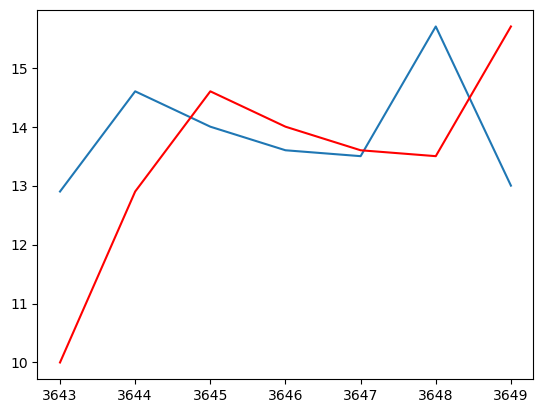

In [18]:
plt.plot(test_y)
plt.plot(predictions, color='red')

### We now have to compare the mse value of the naive forcast model to the mse value of other advanced models
> If the mse of the naive model is smaller than the mse of the other models we will know that our series is a random walk 
    and therefore the advanced models couldn't learn anything from the data

### ***Autoregression Model***

In [21]:
from statsmodels.tsa.ar_model import AutoReg 

In [31]:
df = pd.read_csv('daily-min-temperatures.csv',index_col=[0], parse_dates=True)

In [41]:
X = df.values

In [32]:
train, test = df[1:df.shape[0]-7], df[df.shape[0]-7:]

In [33]:
train

,Temp
Date,
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
1981-01-06,15.8
...,...
1990-12-20,15.4
1990-12-21,13.1
1990-12-22,13.2


In [44]:
model = AutoReg(train, lags=29)
model_fit = model.fit()

/Users/appleplay/miniconda3/envs/myenv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [45]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                   Temp   No. Observations:                 3642
Model:                    AutoReg(29)   Log Likelihood               -8283.622
Method:               Conditional MLE   S.D. of innovations              2.396
Date:                Wed, 15 Mar 2023   AIC                          16629.245
Time:                        20:44:41   BIC                          16821.206
Sample:                            29   HQIC                         16697.643
                                 3642                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5575      0.149      3.749      0.000       0.266       0.849
Temp.L1        0.5886      0.017     35.366      0.000       0.556       0.621
Temp.L2       -0.0908      0.019     -4.703      0.000      -0.129      -0.053
Temp.L3        0.0483      0.019      2.491      0.013       0.010       0.086
Temp.L4        0.0401      0.019      2.067      0.039       0.002       0.078
Temp.L5        0.0393      0.019      2.026      0.043       0.001       0.077
Temp.L6        0.0259      0.019      1.337      0.181      -0.012       0.064
Temp.L7        0.0447      0.019      2.301      0.021       0.007       0.083
Temp.L8        0.0128      0.019      0.657      0.511      -0.025       0.051
Temp.L9        0.0374      0.019      1.928      0.054      -0.001       0.075
Temp.L10      -0.0008      0.019     -0.042      0.967      -0.039       0.037
Temp.L11       0.0048      0.019      0.247      0.805      -0.033       0.043
Temp.L12       0.0185      0.019      0.952      0.341      -0.020       0.056
Temp.L13       0.0269      0.019      1.387      0.165      -0.011       0.065
Temp.L14       0.0006      0.019      0.030      0.976      -0.037       0.039
Temp.L15       0.0248      0.019      1.280      0.201      -0.013       0.063
Temp.L16       0.0074      0.019      0.382      0.702      -0.031       0.045
Temp.L17       0.0099      0.019      0.512      0.609      -0.028       0.048
Temp.L18       0.0342      0.019      1.763      0.078      -0.004       0.072
Temp.L19      -0.0091      0.019     -0.471      0.638      -0.047       0.029
Temp.L20       0.0242      0.019      1.249      0.212      -0.014       0.062
Temp.L21       0.0188      0.019      0.969      0.332      -0.019       0.057
Temp.L22       0.0122      0.019      0.629      0.529      -0.026       0.050
Temp.L23      -0.0186      0.019     -0.958      0.338      -0.057       0.019
Temp.L24      -0.0018      0.019     -0.092      0.927      -0.040       0.036
Temp.L25       0.0167      0.019      0.865      0.387      -0.021       0.055
Temp.L26       0.0198      0.019      1.022      0.307      -0.018       0.058
Temp.L27       0.0098      0.019      0.509      0.611      -0.028       0.048
Temp.L28       0.0062      0.019      0.323      0.747      -0.032       0.044
Temp.L29      -0.0014      0.017     -0.083      0.934      -0.034       0.031
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             1.0086           -0.0000j            1.0086           -0.0000
AR.2             1.0824           -0.2720j            1.1160           -0.0392
AR.3             1.0824           +0.2720j            1.1160            0.0392
AR.4             1.0240           -0.4944j            1.1371           -0.0716
AR

In [46]:
pred = model_fit.predict(start=len(train),end=len(train)+len(test)-1)

/Users/appleplay/miniconda3/envs/myenv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/appleplay/miniconda3/envs/myenv/lib/python3.10/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [47]:
pred

3642    11.871275
3643    13.053794
3644    13.532591
3645    13.243126
3646    13.091438
3647    13.146989
3648    13.176153
dtype: float64

In [49]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y, pred)
mse

1.501525231007005

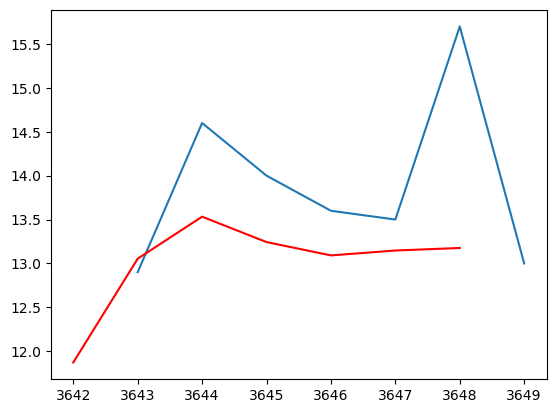

In [50]:
plt.plot(test_y)
plt.plot(pred, color='red')

In [51]:
import numpy as np

In [55]:
data = train
predict = []
for t in test:
    model = AutoReg(data,lags=29)
    model_fit =model.fit()
    y = model_fit.predict(start=len(data),end=len(train)+len(test)-1)
    print(y.values[0])
    predict.append(y.values[0])
    data = np.append(data,t)
    data = pd.Series(data)
    

11.871274847727825


/Users/appleplay/miniconda3/envs/myenv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/appleplay/miniconda3/envs/myenv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/appleplay/miniconda3/envs/myenv/lib/python3.10/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
